In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('onetwotrip_challenge_train.csv')
df_test = pd.read_csv('onetwotrip_challenge_test.csv')

In [3]:
df_train

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,...,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1
0,0,10d654494cbe97bbb25d51ead2600679aff9e097924add...,0,-0.626508,11,12,1,1,0,1,...,1,0,1,1,0,1,0,0,0,0
1,1,4aafc0391f72bbcf60537aece62923baf9ce644b64ac36...,144,-0.393794,5,7,2,0,0,2,...,1,0,1,0,0,0,0,0,0,0
2,2,bac8ffef46348f587c8d17137ab01fb24aef21547c647d...,134,-0.548937,2,3,2,0,0,1,...,1,0,1,1,0,0,0,0,0,0
3,3,0392247b4b87674aba2c32bf2292b105771a6a376871be...,0,-0.238651,10,11,1,1,3,2,...,1,0,1,1,0,0,0,0,0,0
4,4,d1aeefef311bbeb4bd84876c8d49421f276674527d5578...,0,-0.704079,8,11,1,1,0,1,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196051,196051,e33b0b1abb0038261ea9fb5213b9aad000a7686edab9e4...,30,-0.083509,7,7,2,0,0,2,...,1,0,1,0,0,0,0,0,0,0
196052,196052,ed64c2d35a57e9e8e8e5bc84f3addf5552e1691a52a75d...,104,-0.548937,11,11,2,0,0,1,...,1,0,0,0,0,0,0,0,0,0
196053,196053,b74f63aae0b4a21b972a8a322f36e7935dbd44fe47762e...,12,0.692205,9,9,3,0,0,2,...,1,1,1,1,0,0,0,0,0,0
196054,196054,ddd567f873d77e2118458a4d4bf51643c95df4bbad7dba...,0,-0.704079,11,1,1,1,0,1,...,1,0,1,1,0,0,0,0,0,0


In [14]:
df_train[df_train.goal1 == 1]

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,...,indicator_goal23,indicator_goal24,indicator_goal25,goal21,goal22,goal23,goal24,goal25,goal1,tickets_per_person
83,83,369686,0,-0.471365,6,7,1,1,0,1,...,0,1,1,0,0,0,0,1,1,2
104,104,339941,87,0.459491,2,2,3,0,0,2,...,0,0,0,1,1,0,0,0,1,3
180,180,136787,0,1.467919,6,7,1,1,3,1,...,0,1,1,0,1,0,0,0,1,1
234,234,154064,0,0.071634,6,6,1,1,0,2,...,0,1,0,0,0,0,0,0,1,1
253,253,43271,0,-0.471365,9,12,1,1,0,2,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195832,195832,210825,0,-0.316223,12,1,1,1,0,2,...,0,0,0,0,0,0,0,0,1,1
195860,195860,178076,0,1.157633,12,12,1,0,8,1,...,0,1,1,0,0,0,0,0,1,10
195950,195950,75387,0,-0.238651,8,8,1,1,0,2,...,0,0,0,0,0,0,0,0,1,1
195980,195980,46949,0,0.071634,10,10,1,1,3,1,...,0,1,1,0,1,0,0,0,1,1


In [4]:
df_test

,orderid,userid,field0,field1,field2,field3,field4,field5,field6,field7,...,field25,field26,field27,field28,field29,indicator_goal21,indicator_goal22,indicator_goal23,indicator_goal24,indicator_goal25
0,0,3a6a6af55e097d3f92705936a7ea3ca8aef651f5966832...,0,-0.548937,10,10,1,1,0,1,...,1,1,1,0,4,1,1,0,0,1
1,1,2df10f61960163da94a4294773ed9c865296e37c330304...,82,-0.626508,3,4,3,0,0,1,...,1,1,1,0,1,1,1,0,1,1
2,2,20dc3fec5b5eb42fbfe08119063c3a0010a73c7ec94abb...,0,-0.548937,6,8,1,1,0,2,...,35,1,1,0,2,1,0,0,1,1
3,3,ed75b3496977bac207eccb59dc91fe9a8d6a27777a6422...,6,0.304348,7,7,2,0,10,1,...,1,3,1,0,3,1,1,0,1,1
4,4,a346d08351c5fd0bda82984ed7c8b12b6395829da5b857...,115,-0.471365,3,3,2,0,0,1,...,1,1,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455006,455006,e54d8c57b0d2b64d19c59d5068372758067921f06101e2...,0,2.553918,8,8,1,1,10,2,...,41,3,1,0,3,1,1,1,1,0
455007,455007,5af2c8b53a965915f496971f0f105393f7f9c9b0931e6b...,0,-0.238651,9,9,1,1,1,1,...,1,1,1,0,3,1,1,1,1,1
455008,455008,255bfc6ac2f9c98d7f86e59bd72a682e7a50c2db610749...,0,-0.161080,10,11,1,1,0,1,...,1,1,1,0,4,1,1,1,0,0
455009,455009,58a0463aea3ece956b49099380c17cf1d3dd591b70e58c...,0,-0.704079,12,1,1,1,0,1,...,1,1,1,0,4,1,1,0,1,1


In [5]:
le = preprocessing.LabelEncoder()
le.fit(pd.concat([df_train['userid'],df_test['userid']]))
df_train['userid'] = le.transform(df_train['userid'])
df_test['userid'] = le.transform(df_test['userid'])

In [6]:
tickets_per_person = df_train['userid'].value_counts()
df_train['tickets_per_person'] = df_train['userid'].map(tickets_per_person)


In [7]:
from xgboost import XGBClassifier as XGBC
xgb = XGBC(max_depth = 8, n_estimators = 200)

In [8]:
# features for training
features = list(filter(lambda x: 'field' in x, df_train.columns))

In [10]:
from sklearn.model_selection import train_test_split
X = df_train[features]
y = df_train['goal1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_test.shape

((156844, 30), (39212,))

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
%%time
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

Wall time: 49.5 s


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9769713353055187

Text(0.5, 1.0, '2-class ROC curve: ROC AUC=0.50')

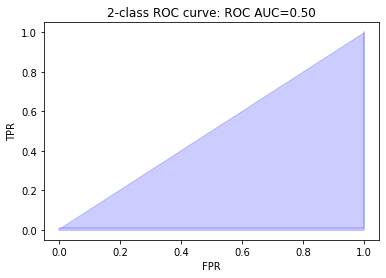

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.step(fpr, tpr, color='b', alpha=0.2,
         where='post')
plt.fill_between(fpr, tpr, alpha=0.2, color='b')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('2-class ROC curve: ROC AUC={0:0.2f}'.format(
          roc_auc_score(y_test, y_pred)))